In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import FV3log

## Extract data from logfile

In [5]:
# global variables for convenience
maindir = "/n/home03/zhuangjw/seasasfs/fromPleiades/logfile_FV3/"
var_list = ['plume0{0}'.format(i) for i in range(1,5)]
var_list

['plume01', 'plume02', 'plume03', 'plume04']

In [4]:
# Extract all results!
Vres_list = [20,40,80,160]
Hres_list = [48,96,192,384]

ds = FV3log.extract_HsVs(maindir, var_list, Hres_list, Vres_list)
ds


 open: C48L20_std.log C48L40_std.log C48L80_std.log C48L160_std.log 
 open: C96L20_std.log C96L40_std.log C96L80_std.log C96L160_std.log 
 open: C192L20_std.log C192L40_std.log C192L80_std.log C192L160_std.log 
 open: C384L20_std.log C384L40_std.log C384L80_std.log C384L160_std.log 

<xarray.Dataset>
Dimensions:  (Hres: 4, Vres: 4, time: 9)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8
  * Vres     (Vres) int64 20 40 80 160
  * Hres     (Hres) int64 48 96 192 384
Data variables:
    plume01  (Hres, Vres, time) float32 1.0 0.884535 0.541212 0.319658 ...
    plume02  (Hres, Vres, time) float32 1.0 0.953083 0.627592 0.48241 ...
    plume03  (Hres, Vres, time) float32 1.0 0.66268 0.372343 0.251123 ...
    plume04  (Hres, Vres, time) float32 1.0 0.774934 0.533533 0.388228 ...

## Plot timeseries of maxVMR

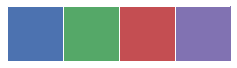

In [90]:
palette = sns.color_palette()[:4]
#palette = sns.light_palette("navy")[-4:]
sns.palplot(palette)

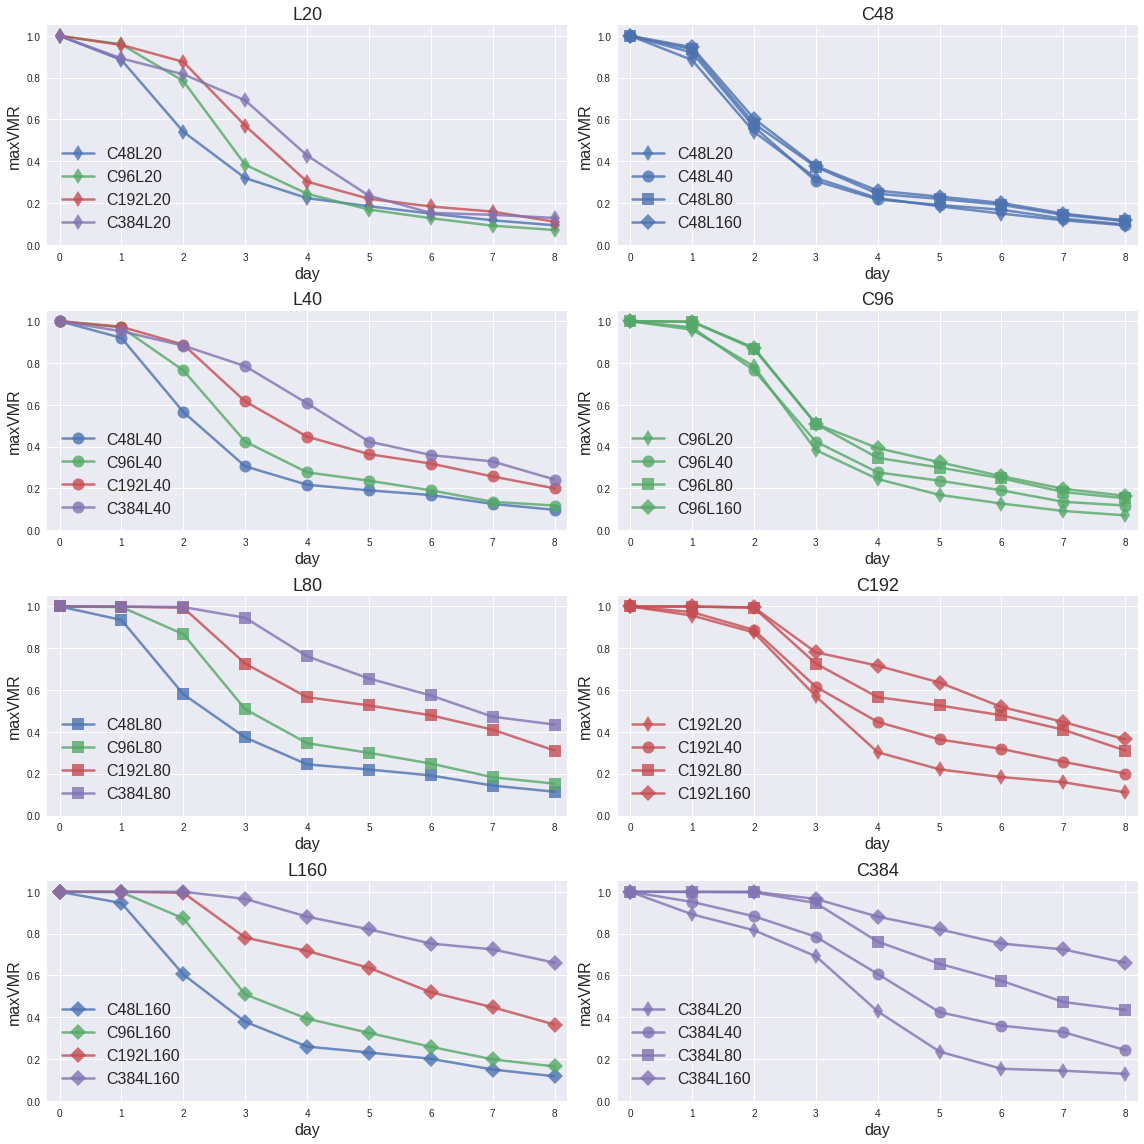

In [108]:
dr = ds['plume01'] #only look at the "standard plume"

titlesize, labelsize = [18,16]
fig, axes = plt.subplots(4,2,figsize=[16,16])

color_list = palette
marker_list = ['d','o','s','D']
alpha = 0.8
linewidth = 2.5
linestyle = '-'
markersize = 12

def set_detail(ax):
    ax.set_ylabel('maxVMR',fontsize=labelsize);ax.set_xlabel('day',fontsize=labelsize)
    ax.set_ylim([0,1.05]);ax.set_xlim([-0.2,8.2])
    ax.legend(fontsize=labelsize, loc=3)

for j,Vres in enumerate(Vres_list):
    ax = axes[j][0]
    ax.set_title(label='L{0}'.format(Vres),fontsize=titlesize)
    
    for i,Hres in enumerate(Hres_list):
        marker = marker_list[j]; color = color_list[i]; 

        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='C{0}L{1}'.format(Hres,Vres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)
        
    set_detail(ax)
        
for i,Hres in enumerate(Hres_list):
    ax = axes[i][1]
    ax.set_title(label='C{0}'.format(Hres),fontsize=titlesize)
    
    for j,Vres in enumerate(Vres_list):
        marker = marker_list[j]; color = color_list[i]; 
        
        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='C{0}L{1}'.format(Hres,Vres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)

    set_detail(ax)
        
plt.tight_layout()

## Plot the maxVMR at the last day

In [110]:
dr = ds['plume01'].isel(time=-1)
dr

<xarray.DataArray 'plume01' (Hres: 4, Vres: 4)>
array([[ 0.093736,  0.097327,  0.113596,  0.117215],
       [ 0.071262,  0.118098,  0.152428,  0.164323],
       [ 0.110981,  0.200145,  0.310812,  0.364484],
       [ 0.128934,  0.242495,  0.435029,  0.660734]], dtype=float32)
Coordinates:
    time     int64 8
  * Vres     (Vres) int64 20 40 80 160
  * Hres     (Hres) int64 48 96 192 384

## Effect of plume size